In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
evt_x = np.loadtxt("data/fit-data-4.txt")

In [3]:
evt_x.max()

199.668612137749

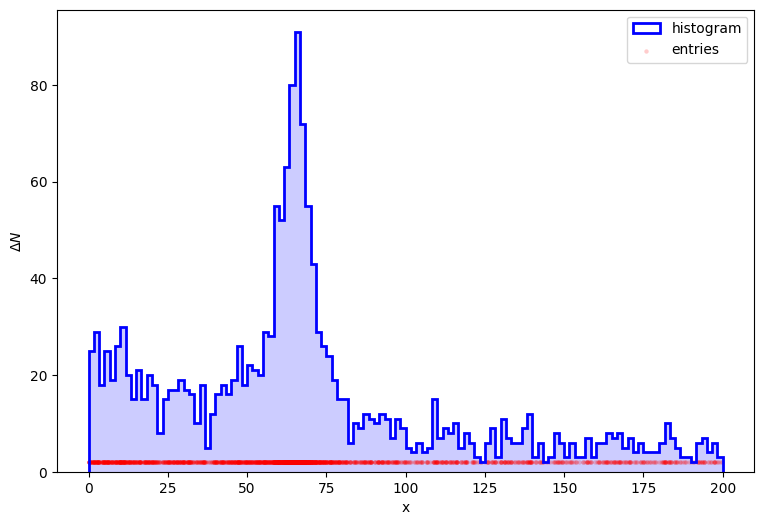

In [4]:
fig, ax = plt.subplots(figsize=(9,6),dpi=100)
n_bins = 120
x_range = (0, 200)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 2), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [5]:
#bins

In [11]:
data_x = (bins+(bins[1]-bins[0])/2)[:-1]
#print(data_x)
#print

In [12]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

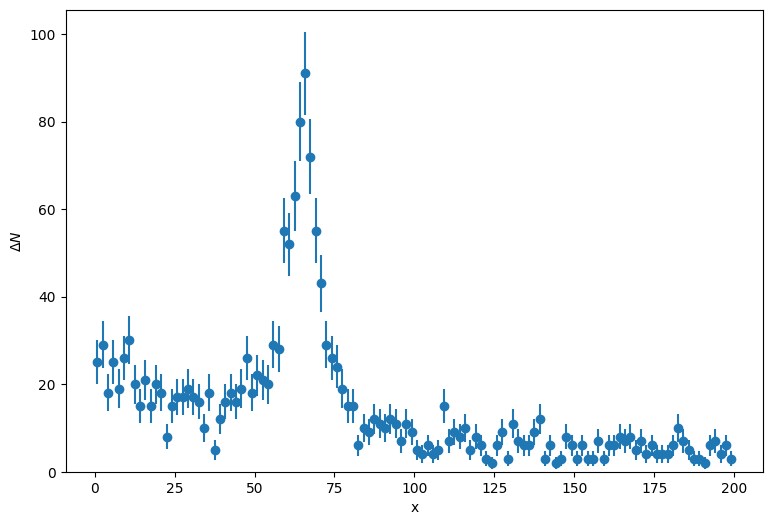

In [13]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [33]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, c, l):
    return b*bkg_pdf(x, l) + c
def sig_model(x, s1, s2, mu, sigma1, sigma2):
    return s1*sig_pdf(x, mu, sigma1) + s2*sig_pdf(x, mu, sigma2)
def sig_model_1(x, s, mu, sigma):
    return s*sig_pdf(x, mu, sigma)
def fit_model(x, b, c, l, s1, s2, mu, sigma1, sigma2):
    return bkg_model(x, b, c, l) + sig_model(x, s1, s2, mu, sigma1, sigma2)

In [34]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, *(250,40,10, 100,60,60,0.5,2.5), name=("B", "C", "$\lambda$", "S1", "S2", "$\mu$", "$\sigma_1$","$\sigma_2$"))
m.limits["$\sigma_1$"] = (0, 10)
m.limits["$\sigma_2$"] = (0, 100)

In [35]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 129.9 (χ²/ndof = 1.2)      │              Nfcn = 939              │
│ EDM = 5.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B          │  0.79e3   │  0.18e3   │            │            │         │         │       │
│ 1 │ C          │    4.3    │    0.5    │            │            │         │         │       │
│ 2 │ $\lambda$  │    38     │    11     │            │            │         │         │       │
│ 3 │ S1         │  0.53e3   │  0.15e3   │            │            │         │         │       │
│ 4 │ S2         │  0.56e3   │  0.12e3   │            │            │         │         │       │
│ 5 │ $\mu$      │   65.05   │   0.30    │            │            │         │         │       │
│ 6 │ $\sigma_1$ │    3.8    │    0.7    │            │            │    0    │   10    │       │
│ 7 │ $\sigma_2$ │   11.5    │    3.0    │            │            │    0    │   100   │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬─────────────────────────────────────────────────────────────────────────────────────────┐
│            │          B          C  $\lambda$         S1         S2      $\mu$ $\sigma_1$ $\sigma_2$ │
├────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│          B │   3.29e+04     -85.46     1.95e3   -0.014e6          0       2.36      -52.9       -377 │
│          C │     -85.46      0.299      -5.23      28.98       0.51      -0.01       0.11       0.81 │
│  $\lambda$ │     1.95e3      -5.23        128    -0.83e3          0       0.10       -3.2        -23 │
│         S1 │   -0.014e6      28.98    -0.83e3   2.22e+04   -0.014e6       2.55       89.6        388 │
│         S2 │          0       0.51          0   -0.014e6   1.44e+04      -3.31      -61.3       -188 │
│      $\mu$ │       2.36      -0.01       0.10       2.55      -3.31     0.0929       0.00       0.03 │
│ $\sigma_1$ │      -52.9       0.11       -3.2       89.6      -61.3       0.00      0.467        1.5 │
│ $\sigma_2$ │       -377       0.81        -23        388       -188       0.03        1.5       8.81 │
└────────────┴─────────────────────────────────────────────────────────────────────────────────────────┘

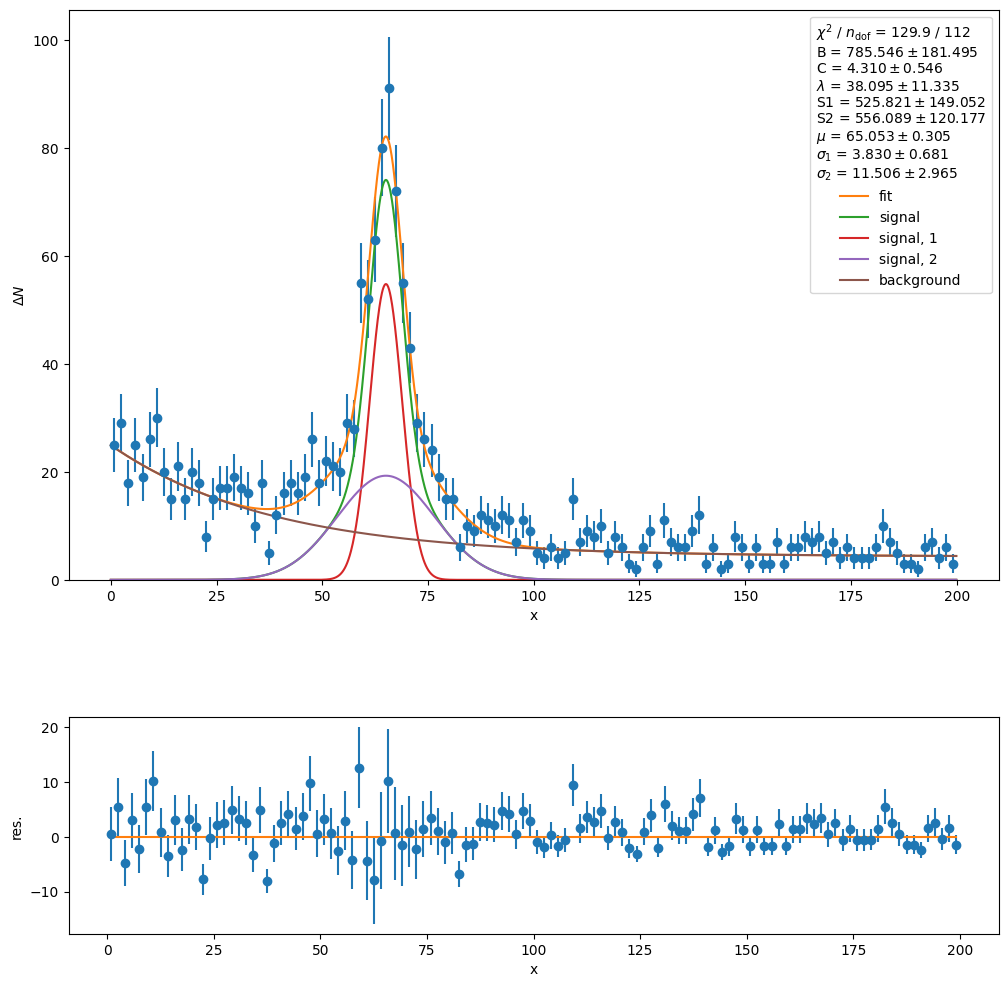

In [45]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
b, c, l, s1, s2, mu, sigma1, sigma2 = m.values
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, b, c, l)
sig_y_f = sig_model(data_x_f, s1, s2, mu, sigma1, sigma2)
sig_y_f1 = sig_model_1(data_x_f, s1, mu, sigma1)
sig_y_f2 = sig_model_1(data_x_f, s2, mu, sigma2)

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, sig_y_f1, label="signal, 1")
ax0.plot(data_x_f, sig_y_f2, label="signal, 2")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model(data_x, *m.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()
plt.show()